# Linear Regression

## Initialization

### Set Directory and Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from statsmodels.formula.api import ols # Import the ols function

In [3]:
# set plot style
plt.style.use('seaborn')
# set plot size
plt.rcParams['figure.figsize'] = (12, 8)

### Import data

In [4]:
data = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/data_sets')
taiwan_real_estate = pd.read_csv(data/'taiwan_real_estate2.csv')

## Linear Regression

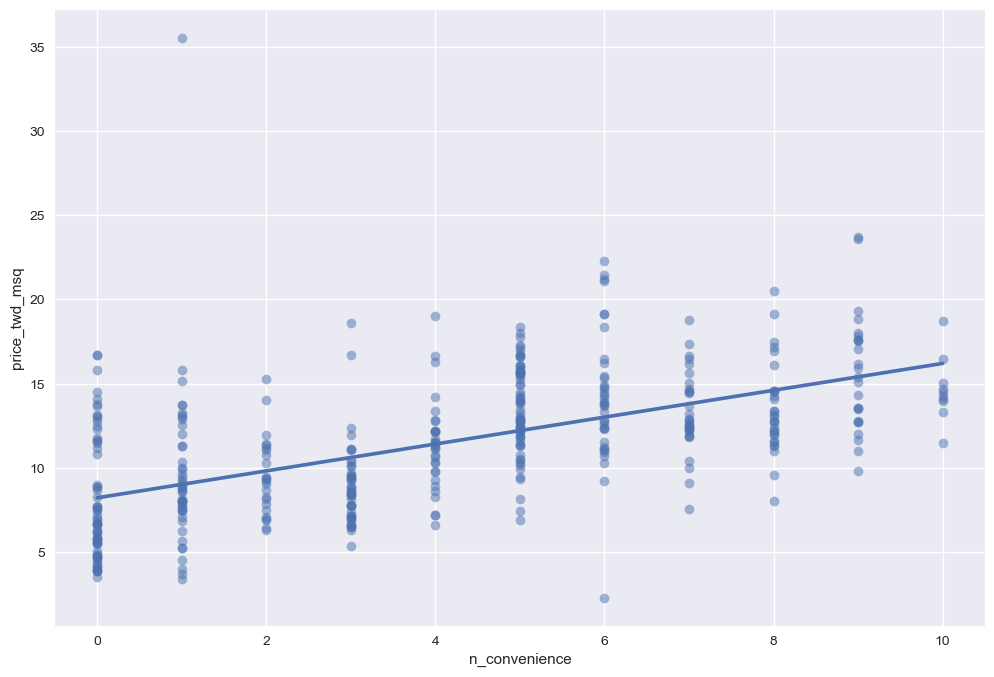

In [5]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=True,
         scatter_kws={'alpha': 0.5})
plt.show()

In [6]:
# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


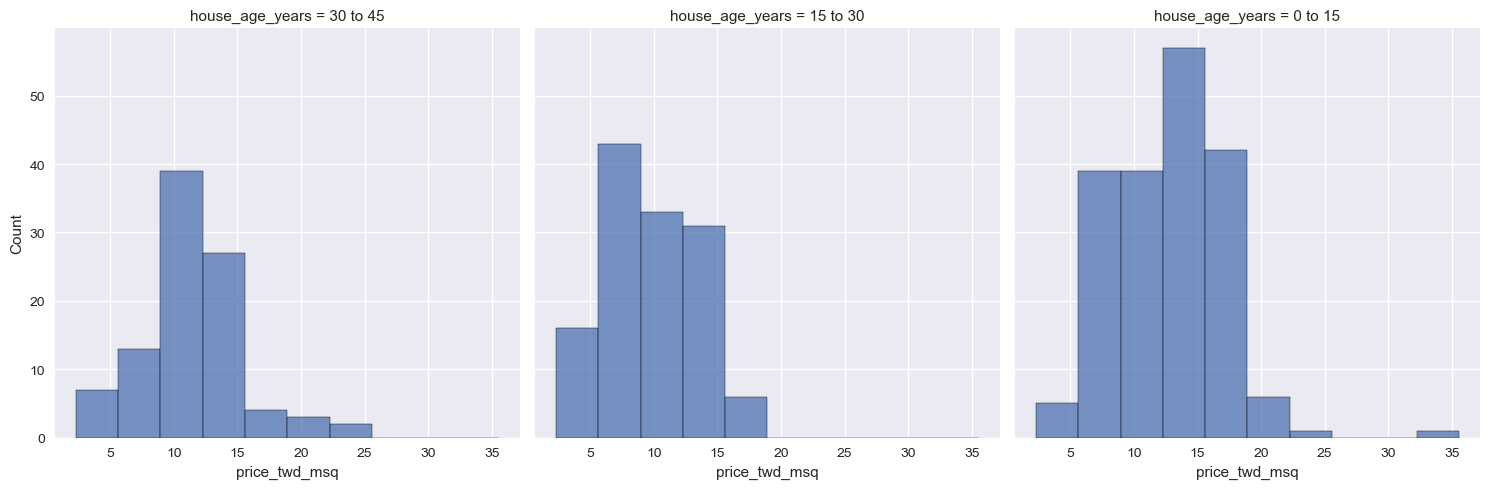

In [7]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years')

# Show the plot
plt.show()

In [8]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby(['house_age_years'])['price_twd_msq'].mean()
# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [9]:
# Create the model object
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_age = mdl_price_vs_age.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [10]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
# Print it
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


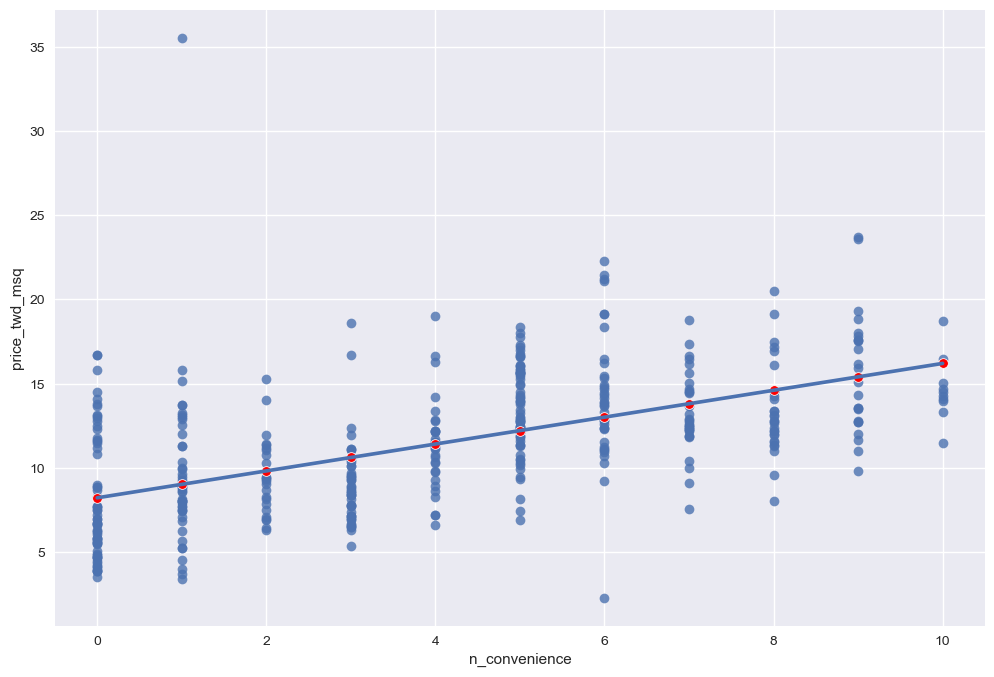

In [11]:
# Create a new figure, fig
fig = plt.figure()
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='red')

# Show the layered plot
plt.show()

In [12]:
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})
print(impossible)
mdl_price_vs_conv.predict(impossible)

   n_convenience
0           -1.0
1            2.5


0     7.426158
1    10.219437
dtype: float64

In [16]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [14]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.41e-37
Time:                        01:40:14   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [13]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

intercept = coeffs[0]
slope = coeffs[1]

price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq,'\n')

print(price_twd_msq.assign(prediction_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035 

    n_convenience  prediction_auto
0        8.224237         8.224237
1        9.022317         9.022317
2        9.820397         9.820397
3       10.618477        10.618477
4       11.416556        11.416556
5       12.214636        12.214636
6       13.012716        13.012716
7       13.810795        13.810795
8       14.608875        14.608875
9       15.406955        15.406955
10      16.205035        16.205035


**Regression to the Mean**

This concept states that the linear regression equation is:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\epsilon$ is the error term. The error term is the difference between the actual value of $y$ and the predicted value of $y$. The regression to the mean states that the error term is the difference between the actual value of $y$ and the mean of $y$. This means that the error term is the difference between the actual value of $y$ and the predicted value of $y$.